# Hofstede's 6 Dimensions and Corruption

## Executive Summary

For companies working internationally, it is important to be aware of the corruption they may need to deal with in new countries. However, data is not always available to make a meaningful comparison and therefore, Hofstede's 6 dimensions will be compared with a variety of different corruption ratings to see if any correlate. Later, this can be used to develop a predictor.

Key insights:

- There are two pairs of Hofstede values with strong negative correlation (long term orientation and indulgence and individualism and power distance).
- The corruption ratings strongly correlate aside fom the Bertelsmann index.
- "Power distance" correlated the highest with 4 of the corruption rankings.
- "Masculinity" showed the least correlation with the corruption rankings.
- The "CPI Score 2019" was the most useful corruption ranking (best indicator of the correlation trend).
- "Bertelsmann" was the least useful corruption ranking.

## Introduction

For companies working internationally, it is important to be aware of the corruption organisations may need to deal with in new countries. However, data is not always available to make a meaningful comparison and therefore, Hofstede's 6 dimensions will be compared with a variety of different corruption ratings to see if any correlate. Later, this may be used to develop a predictor. For the analysis, data will be used from Transparency International's CPI (Corruption Perception Index: https://www.transparency.org/en/cpi/2019/results/table) and the Hofstede 6 dimensions of culture (https://geerthofstede.com/research-and-vsm/dimension-data-matrix/).

The aim of the following data analysis is to answer the following questions:

- Which dimension has the strongest positive or negative correlation to corruption?
- Which corruption ranking do the Hoffstede metrics correlate well or poorly with?

Overview of terms:

Hofstede's 6 Dimensions

While working at IBM, Hofstede was given the opportunity to survey a wide range of different individuals working in IBM's offices around the world. From these surveys, particular trends emerged. Individuals from certain countries would be more likely to give a similar answers, allowing them to be averaged and placed on 6 different scales (dimensions) and compared. For example, countries with a high power distance (China is one case), are less likely to see their boss as an equal than people from a country lower down in the scale (such as Holland).

More information about the 6 dimensions: https://hi.hofstede-insights.com/national-culture

Corruption Perception Index

The CPI scores and ranks countries/territories based on how corrupt a country’s public sector is perceived to be by experts and business executives. It is a composite index, a combination of 13 surveys and assessments of corruption, collected by a variety of reputable institution and it is the most widely used indicator of corruption worldwide.


More information about CPI: https://www.transparency.org/en/cpi


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
from numpy.random import seed
from numpy.random import randint
seed(1)

## Obtaining and Cleaning Data

Firstly, the two datasets will be loaded and cleaned. Columns with more than 50% percent missing values will be removed as they are unlikely to be distributed widely enough to show much.

In [2]:
#columns are renamed for clarity
df_hof = pd.read_excel('6-dimensions-for-website-2015-08-16.xls')
df_hof.rename(columns={'pdi':'power_distance','idv':'individualism', 'mas':'masculinity', 'uai': 'uncertainty_avoidance', 'ltowvs':'long_term_orientation','ivr':'indulgence'}, inplace=True)

df_hof.drop(columns='ctr', inplace=True)
df_hof

,country,power_distance,individualism,masculinity,uncertainty_avoidance,long_term_orientation,indulgence
0,Africa East,64.0,27.0,41.0,52.0,32.000000,40.000000
1,Africa West,77.0,20.0,46.0,54.0,9.000000,78.000000
2,Albania,NaN,NaN,NaN,NaN,61.460957,14.508929
3,Algeria,NaN,NaN,NaN,NaN,25.944584,32.366071
4,Andorra,NaN,NaN,NaN,NaN,NaN,65.000000
...,...,...,...,...,...,...,...
106,Uruguay,61.0,36.0,38.0,100.0,26.196474,53.348214
107,Venezuela,81.0,12.0,73.0,76.0,15.617128,100.000000
108,Vietnam,70.0,20.0,40.0,30.0,57.178841,35.491071
109,Zambia,NaN,NaN,NaN,NaN,30.226700,42.187500


In [3]:
#the columns will be renamed, regions converted to numerical values to allow for comparison and data which isn't needed will be 
#dropped.

cols = {'Country':'country', 'Region':'region', 'CPI score 2019': 'CPI_score_2019', 'African Development Bank CPIA':'african_dev_bank_CPIA', 'Bertelsmann Foundation Sustainable Governance Index':'bertelsmann_foundation_sus_gov', 'Bertelsmann Foundation Transformation Index':'bertelsmann_foundation_trans','Economist Intelligence Unit Country Ratings':'economist_intel_unit','Freedom House Nations in Transit Ratings':'freedom_house_nations_in_transit','Global Insight Country Risk Ratings':'global_insight_country_risk','IMD World Competitiveness Yearbook':'IMD_world_compet','PERC Asia Risk Guide':'PERC_asia_risk','PRS International Country Risk Guide':'PRS_int_country_risk','Varieties of Democracy Project':'varieties_of_democracy_project','World Bank CPIA':'world_bank_CPIA','World Economic Forum EOS':'world_economic_forum_EOS','World Justice Project Rule of Law Index':'world_justice_project_rule_of_law'}
regions ={'SSA':0, 'AME':1, 'AP':2, 'WE/EU':3,'ECA':4, 'MENA':5}
df_temp = pd.read_excel('CPI2019.xlsx', header=2)
df_cpi = df_temp.copy()
df_cpi.drop(columns=['ISO3','Rank','standard error ', 'Number of sources','Lower CI','Upper CI'], inplace=True)
df_cpi.rename(cols, axis='columns', inplace=True)
df_cpi['region_num'] = df_cpi['region']
df_cpi.region_num.replace(regions, inplace=True)
df_cpi

,country,region,CPI_score_2019,african_dev_bank_CPIA,bertelsmann_foundation_sus_gov,bertelsmann_foundation_trans,economist_intel_unit,freedom_house_nations_in_transit,global_insight_country_risk,IMD_world_compet,PERC_asia_risk,PRS_int_country_risk,varieties_of_democracy_project,world_bank_CPIA,world_economic_forum_EOS,world_justice_project_rule_of_law,region_num
0,Denmark,WE/EU,87,NaN,97.0,NaN,90.0,NaN,83,94.0,NaN,93.0,77.0,NaN,79.0,86.0,3
1,New Zealand,AP,87,NaN,97.0,NaN,90.0,NaN,83,83.0,NaN,93.0,77.0,NaN,89.0,82.0,2
2,Finland,WE/EU,86,NaN,88.0,NaN,72.0,NaN,83,94.0,NaN,93.0,75.0,NaN,93.0,87.0,3
3,Singapore,AP,85,NaN,NaN,73.0,90.0,NaN,83,91.0,89.0,85.0,77.0,NaN,89.0,85.0,2
4,Sweden,WE/EU,85,NaN,88.0,NaN,90.0,NaN,83,84.0,NaN,93.0,78.0,NaN,77.0,87.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,AME,16,NaN,NaN,9.0,20.0,NaN,10,23.0,NaN,15.0,25.0,NaN,16.0,13.0,1
176,Yemen,MENA,15,NaN,NaN,13.0,20.0,NaN,10,NaN,NaN,15.0,13.0,10.0,23.0,NaN,5
177,Syria,MENA,13,NaN,NaN,9.0,20.0,NaN,10,NaN,NaN,15.0,13.0,NaN,NaN,NaN,5
178,South Sudan,SSA,12,11.0,NaN,17.0,NaN,NaN,10,NaN,NaN,NaN,13.0,10.0,NaN,NaN,0


As can be seen below, the amount of Hofstede dimensions are all fairly high but a number of the of the CPI values are extremely low and will therefore be removed. Please note, white space indicates missing values and the number of values present can be seen at the top of the bars, the distribution within the dataset is shown in the matrix below.

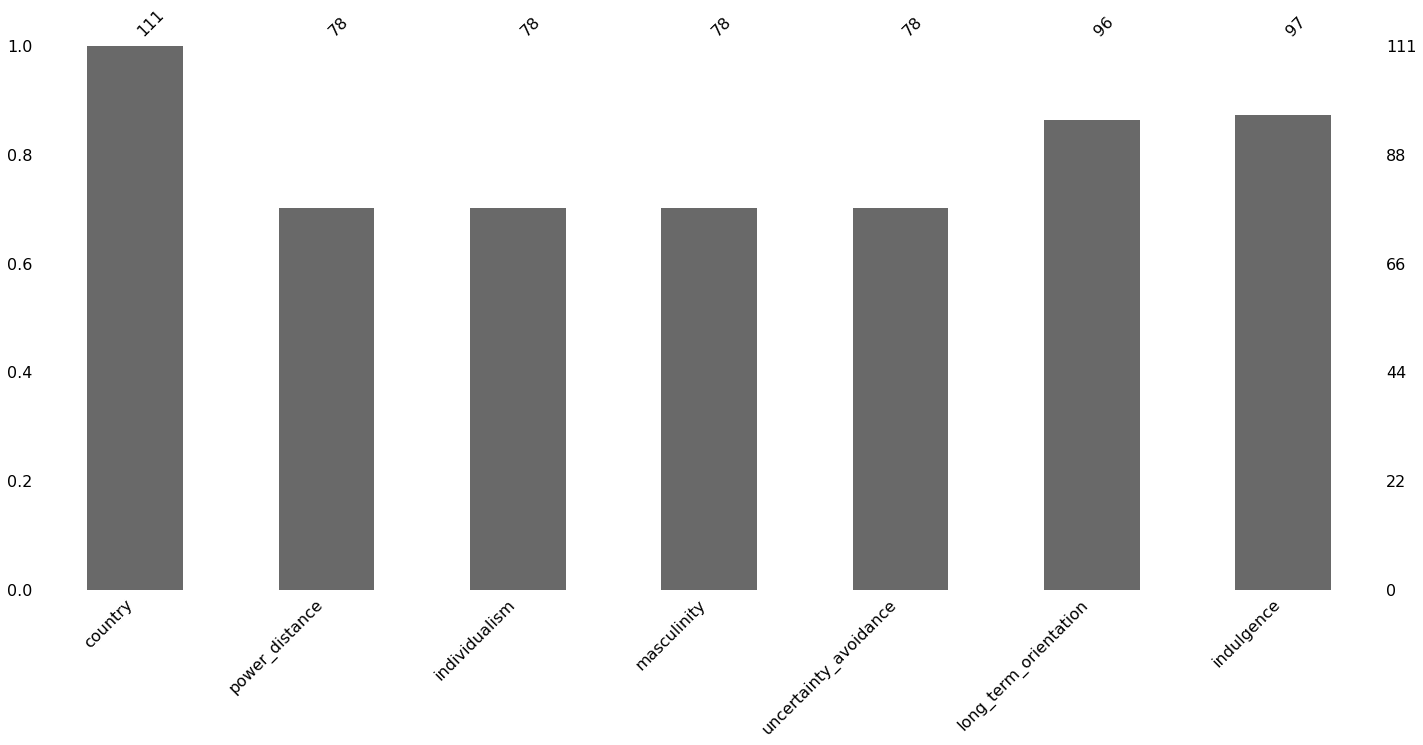

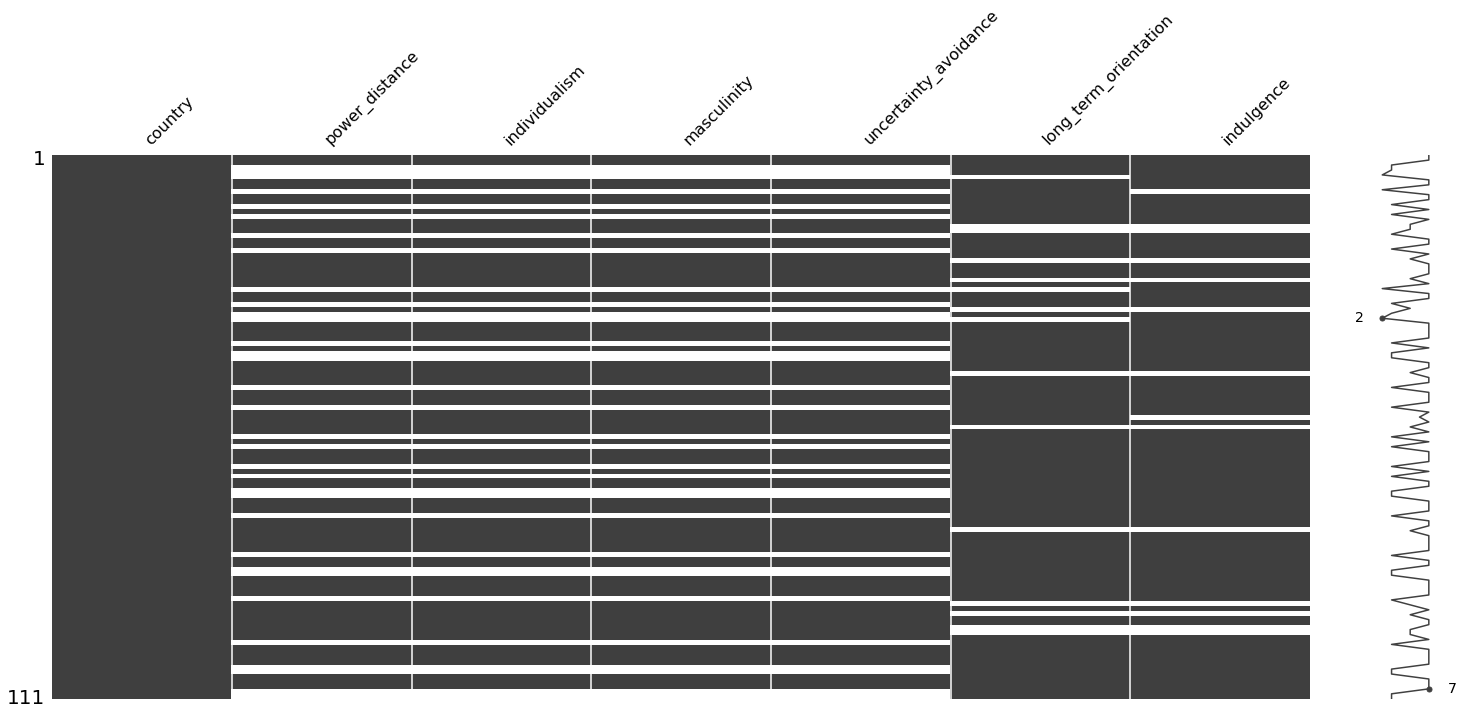

In [4]:
display(msno.bar(df_hof))
display(msno.matrix(df_hof))


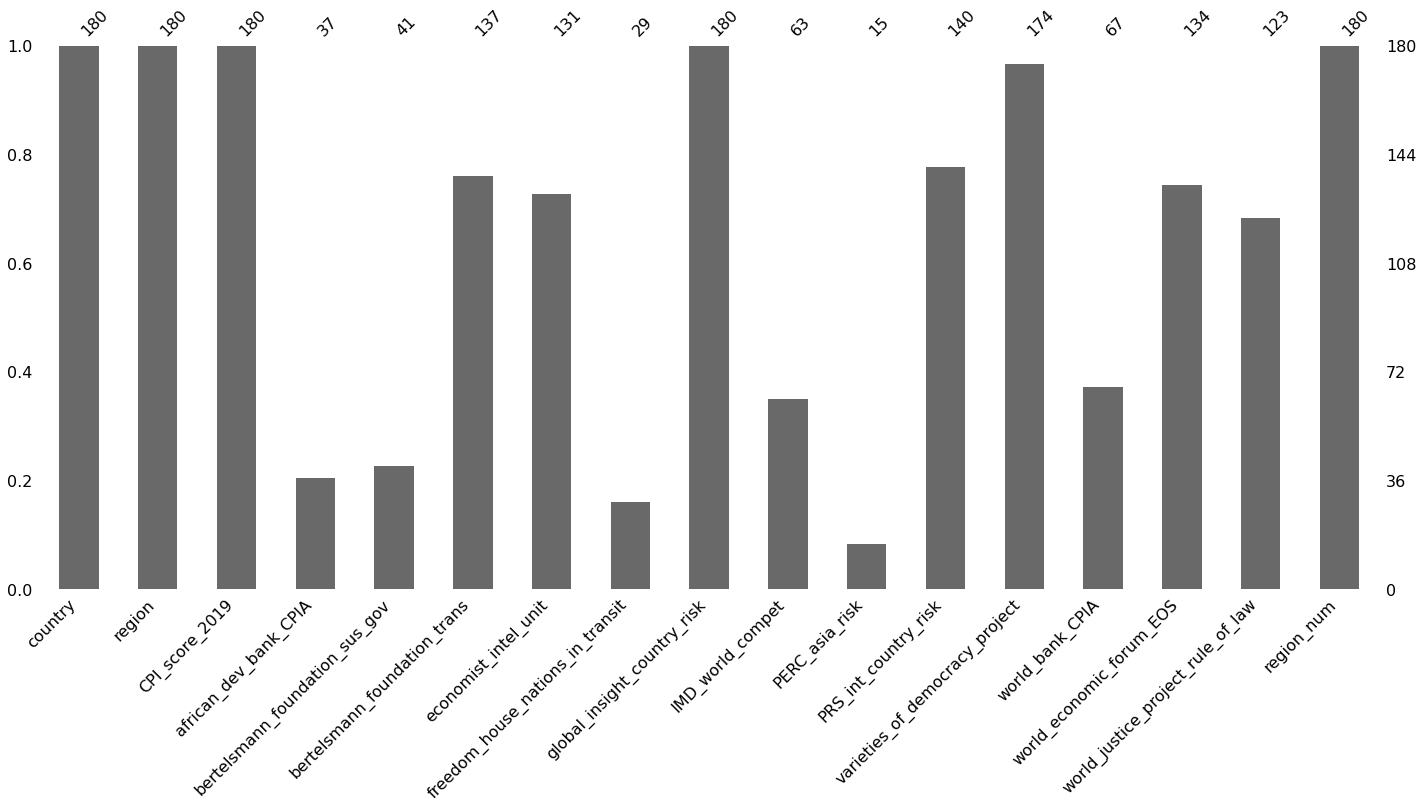

In [5]:
msno.bar(df_cpi)

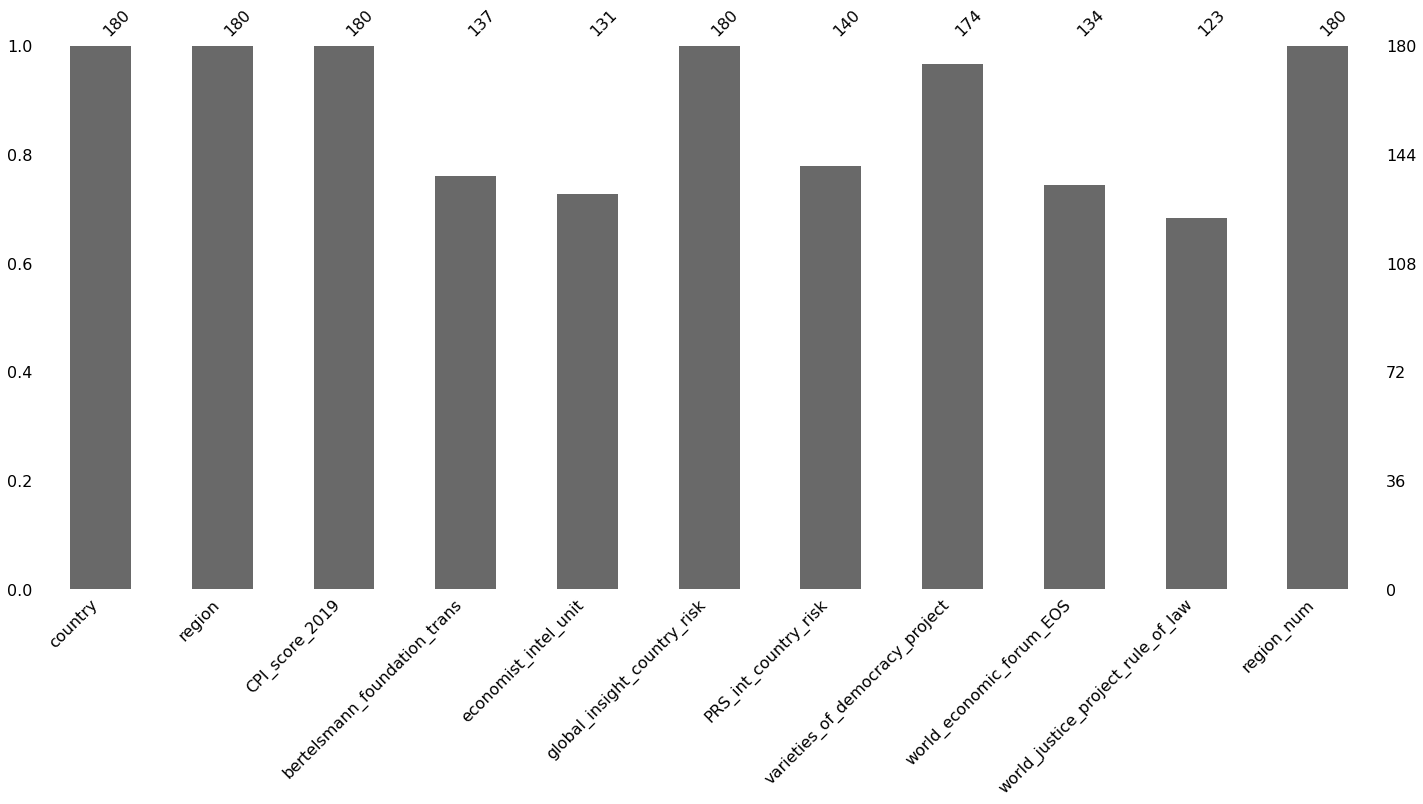

In [6]:
#this removes columns with over 50% missing values

max_number_of_nas = len(df_cpi)/2
df_cpi = df_cpi.loc[:, (df_cpi.isnull().sum(axis=0) <= max_number_of_nas)]
msno.bar(df_cpi)

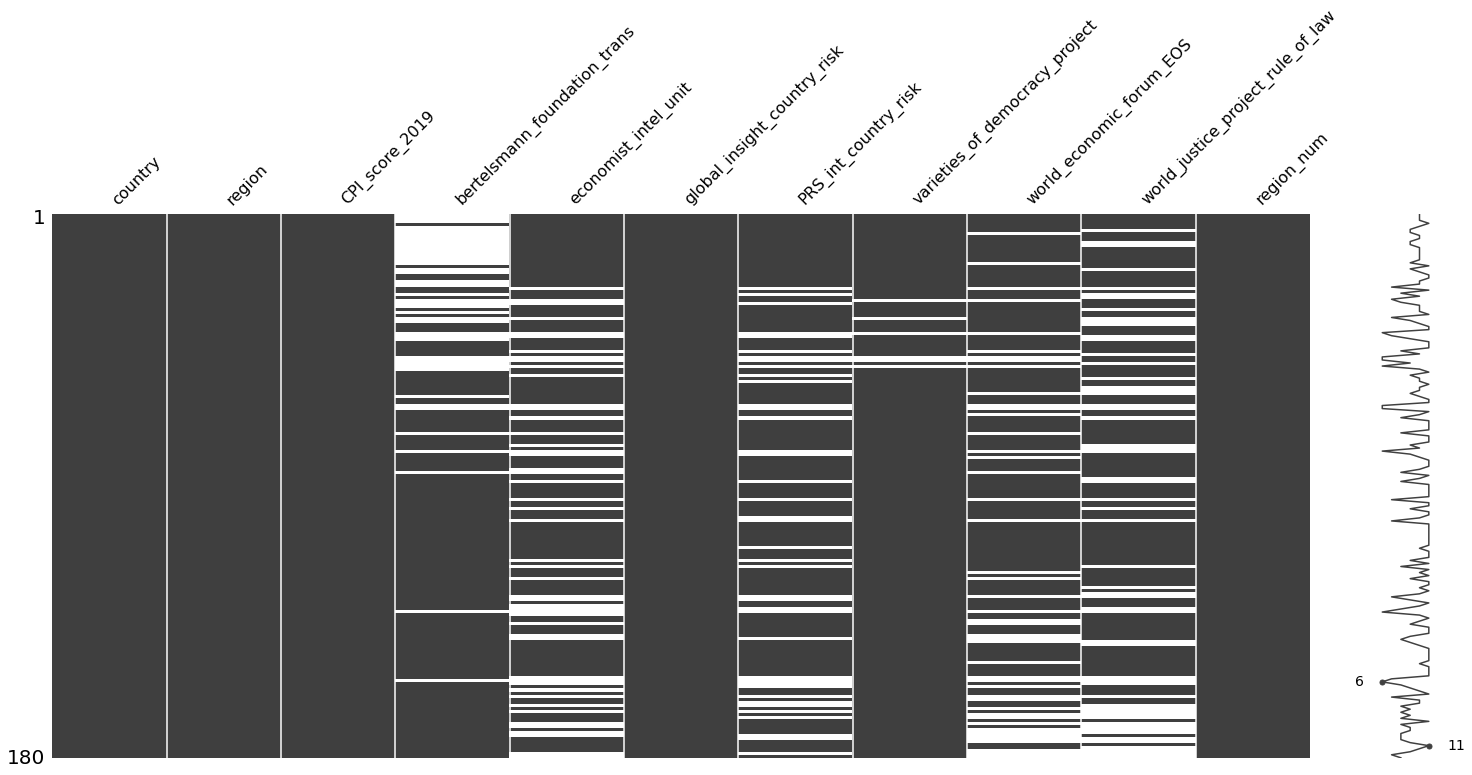

In [7]:
msno.matrix(df_cpi)

The two dataframes will be merged on the 'country' column. Therefore, it is important to ensure that countries use the same name (for example USA would not merge correctly with Unites States of America). Values from both will be compared to form a list of replacement values.

In [8]:
hof_countries = set(df_hof['country'].unique())
cpi_countries = set(df_cpi['country'].unique())
countries = hof_countries.union(cpi_countries) 
countries

{'Afghanistan',
 'Africa East',
 'Africa West',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Arab countries',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belgium French',
 'Belgium Netherl',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Canada French',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Rep',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Rep',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 '

There are a number of countries with more than one name and these are replaced below. Values are taken from both dataframes and so thus will be run on both.

In [9]:
rename_countries = {'Bosnia':'Bosnia and Herzegovina', 'Czech Rep':'Czech Republic', 'Congo': 'Democratic Republic of the Congo', 'Dominican Rep':
 'Dominican Republic', 'Great Britain':'United Kingdom', 'Korea South': 'Korea, South', 'Kyrgyz Rep':'Kyrgyzstan', 'Macedonia Rep': 'North Macedonia', 'Slovak Rep':
 'Slovakia', 'U.S.A.': 'United States of America'}
df_hof = df_hof.copy()
df_cpi = df_cpi.copy()

df_hof.replace(rename_countries, inplace=True)
df_cpi.replace(rename_countries, inplace=True)

## Exploratory Data Analysis

Correlation and distribution within the two datasets will be explored which may lead to some insights.

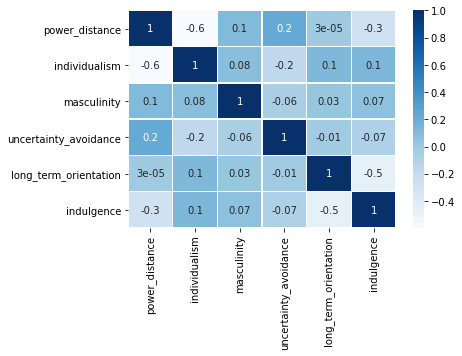

In [10]:
df_hof_corr = df_hof.corr()
df_cpi_corr = df_cpi.corr()
sns.heatmap(df_hof_corr, annot=True, linewidth=0.5, cmap="Blues", fmt='.1g')


Correlation seems quite low across most values aside from long term orientation and indulgence (-0.5) and individualism and power distance (-0.6). It seems likely that the corruption values will correlate with one of these pairs or with one other individual value. Uncertainty avoidance and have the lowest correlation at -0.01. A scatter chart will be created to see if any pattern arise.

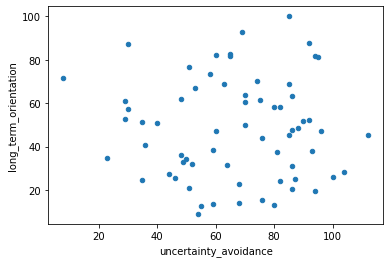

In [11]:
df_hof.plot(kind='scatter', x='uncertainty_avoidance', y='long_term_orientation')

There is little evidence of strong clustering and the values are fairly evently distributed across the range. If a CPI value correlates with one of these values, it is unlikely that the other will be useful.

CPI values

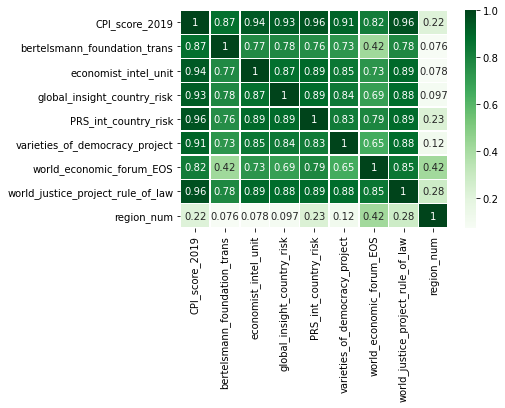

In [12]:
sns.heatmap(df_cpi_corr, annot=True, linewidth=0.5, cmap="Greens", fmt='.2g')

All values best correlate with CPI_score_2019 aside from world_economic_forum_EOS which shows the strongest correlation with world_justice_project_rule_of_law.

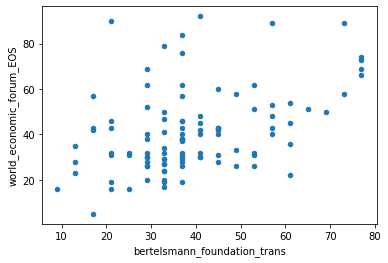

In [13]:
df_cpi.plot(kind='scatter', x='bertelsmann_foundation_trans', y='world_economic_forum_EOS')

The slight correlation can be seen, with a cluster around the lower ranges of both values. The Bertelsmann Foundation statistics are clustered in increments.

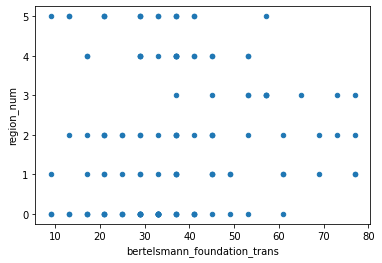

In [14]:
df_cpi.plot(kind='scatter', x='bertelsmann_foundation_trans', y='region_num')

The distribution of values curve across up the different regions. There is very little correlation, but trends can definitely be seen with these values.

From the EDA, several different insights have emerged:

- There are two pairs of Hofstede dimensions with strong negative correlation (long term orientation and indulgence and individualism and power distance), it is likely that corruption will correlate will one of these pairs or with one individual value.
- The CPI values strongly correlate aside fom the Bertelsmann value and the region value which also do not correlate well, splitting the options into three. Some patterns emerged when Bertelsmann values and regions were looked into in more depth, indicating they may be useful for non-correlation methods.

## Final analysis

The two dataframes will be merged, the correlation will be shown and finally, the dimensions will be ranked.

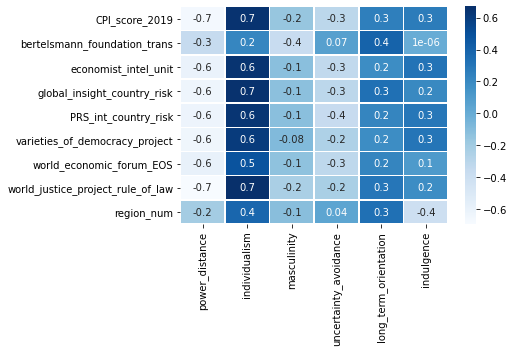

In [15]:
df = df_hof.merge(df_cpi, how='left')

df_corr = df.corr()

collist = df_corr.columns.tolist()

for item in range(len(df_corr)):
    if item <= 5: df_corr.drop(collist[item], axis=0, inplace=True)
    else: df_corr.drop(collist[item], axis=1, inplace=True)
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap="Blues", fmt='.1g')

Individualism seems to have the overall strongest correlation, and uncertainty avoidance is negatively correlated with all of the values.

The values will be ranked fully below.

In [16]:
#value preparation

corr_types = df_corr.index.tolist()
hoff_vals = df_corr.columns.tolist()
values = []
max_vals = []
min_vals = []


for col in range(len(hoff_vals)):
    values.append(df_corr[hoff_vals[col]].tolist())

normal_vals = df_corr.values.tolist() 
    
for i in range(len(normal_vals)):
    max_vals.append(max(normal_vals[i], key=abs))
    min_vals.append(min(normal_vals[i], key=abs))



max_vals = np.array(max_vals)
min_vals = np.array(min_vals)
values = np.array(values)
normal_vals = np.array(normal_vals)


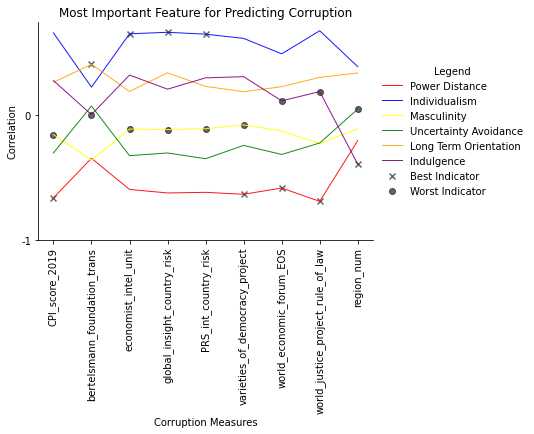

In [17]:
#chart creation

corr_len = np.array(range(len(corr_types)))

names = ['Power Distance','Individualism', 'Masculinity', 'Uncertainty Avoidance','Long Term Orientation','Indulgence']
colours = ['red', 'blue', 'yellow', 'green', 'orange','purple']

for i in range(len(names)):
    a=plt.plot(corr_len, values[i], linewidth=1.0, color=colours[i], alpha=0.9, label=names[i])

max_scatter = plt.scatter(corr_len, max_vals, label='Best Indicator', c='black', marker="x", alpha=0.6)
min_scatter = plt.scatter(corr_len, min_vals, label='Worst Indicator',c='black', marker="o", alpha=0.6)

plt.xticks(corr_len,corr_types, rotation=90)
plt.yticks(range(-1,1),[-1,0, 1])


plt.xlabel('Corruption Measures')
plt.ylabel('Correlation')
plt.title('Most Important Feature for Predicting Corruption')
plt.legend(frameon=False, title='Legend', loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.savefig("corruption_features.png", bbox_inches = "tight")

- Power distance performs the best overall, acheiving best indicator 4 times.
- Individualism performs second best with 3.
- Masculinity is the worst performer overall.
- Uncertainty avoidance is fairly weak.
- Long-term orientation achieves best indicator 1 time, but it is with Bertelsman.
- Indulgence is the 2nd worst performer.
- Bertelsmann correlated the least with the Hofstede dimensions.

## Conclusion

In conclusion, an analysis was performed on corruption ratings and the Hofstede's 6 cultural dimensions to find if there were any elements which correlated. During the EDA, it came to light that there were three correlation clusters within the 6 dimensions and the corruption ratings mostly correlated with each other. The corruption ratings positively correlated with individualism and negatively with power distance, one of the three correlation clusters identified in the EDA. The Bertelsmann index was the least indicative of the overall trend shown in the other corruption ratings.